# Research on Car Sales Ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Open the data file and study the general information. 

In [1]:
### Project: Exploratory Data Analysis
## I will be studying data collected from a company with free advertisement for selling vehicles. I will use factors such
## as: vehicle's age, the ad placement date, mileage, number of cyliners, and condition to learn if they determine price
## of a vehicle. The goal of my project is to find which factors impact price most when selling a vehicle.

#Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

vehicles = pd.read_csv('https://code.s3.yandex.net/datasets/vehicles_us.csv')
#General information about data
vehicles.info()
#First 5 rows of data
vehicles.head(5)
#Descriptive data of each column
#vehicles.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Conclusion

Based on information from the data there are 51525 advertisements. The data that has missing values are model_year, cylinders, odometer, paint_color, and is_4wd

## Data preprocessing

In [2]:
## 2.1

#Check for duplicates
vehicles.duplicated().sum()


#Replace missing values
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(0)
vehicles['is_4wd'].isnull().sum()


vehicles.groupby(['type', 'model'])['cylinders'].median()
vehicles['cylinders'] = vehicles.groupby(['type', 'model'])['cylinders'].apply(lambda x: x.fillna(x.median()))
vehicles.dropna(subset = ['cylinders'], inplace = True)
vehicles['cylinders'].isnull().sum()


vehicles.dropna(subset = ['model_year'], inplace = True)
vehicles['model_year'].isnull().sum()


vehicles.groupby(['type','model_year'])['odometer'].median()
vehicles['odometer'] = vehicles.groupby(['type','model_year'])['odometer'].apply(lambda x: x.fillna(x.median()))
vehicles.dropna(subset = ['odometer'], inplace = True)
vehicles['odometer'].isnull().sum()


vehicles['paint_color'] = vehicles['paint_color'].fillna('Unknown')
vehicles['paint_color'].isnull().sum()

vehicles.info()
vehicles.head(10)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47883 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         47883 non-null  int64  
 1   model_year    47883 non-null  float64
 2   model         47883 non-null  object 
 3   condition     47883 non-null  object 
 4   cylinders     47883 non-null  float64
 5   fuel          47883 non-null  object 
 6   odometer      47883 non-null  float64
 7   transmission  47883 non-null  object 
 8   type          47883 non-null  object 
 9   paint_color   47883 non-null  object 
 10  is_4wd        47883 non-null  float64
 11  date_posted   47883 non-null  object 
 12  days_listed   47883 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,Unknown,1.0,2018-06-23,19
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,165025.0,automatic,pickup,Unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,Unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
10,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38


### 2.1 Conclusion

There are no duplicated rows.

Columns with missing values are model_year, cylinders, odometer, paint_color, and is_4wd. In the column 4_wd, I replace missing values with zeros. Since the data type is boolean and the column only consisted of true values, I assumed the missing values were false. I replaced the values in column paint_color with the string value "Unknown". I did this so we can compare the price of vehicles when the color is given and when it is not. For columns odometer and cylinders I replaced missing values with the median value grouped by both type and model year. The missing values in column model_year were removed. The values missing from model_year only made up 7% of data. I felt it was a small enough amount to remove without messing up the data.

The data could be missing because the seller did not include it in the ad, such as paint color of the vehicle. It is also possible the seller does not know the value. Such instances would be if the odometer is broke in the vehicle. Other possiblities could be the data went missing when observation took place.

In [3]:
## 2.2

#Replace float type with int type in column is_4wd
vehicles['is_4wd'] = pd.to_numeric(vehicles['is_4wd']).astype('int')
#Replace float type with int type in column odometer
vehicles['odometer'] = pd.to_numeric(vehicles['odometer']).astype('int')
#Replace float type with int type in column cylinders
vehicles['cylinders'] = pd.to_numeric(vehicles['cylinders']).astype('int')
#Replace float type with int type in column model_year
vehicles['model_year'] = pd.to_numeric(vehicles['model_year']).astype('int')

vehicles.info()
vehicles.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47883 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         47883 non-null  int64 
 1   model_year    47883 non-null  int32 
 2   model         47883 non-null  object
 3   condition     47883 non-null  object
 4   cylinders     47883 non-null  int32 
 5   fuel          47883 non-null  object
 6   odometer      47883 non-null  int32 
 7   transmission  47883 non-null  object
 8   type          47883 non-null  object
 9   paint_color   47883 non-null  object
 10  is_4wd        47883 non-null  int32 
 11  date_posted   47883 non-null  object
 12  days_listed   47883 non-null  int64 
dtypes: int32(4), int64(2), object(7)
memory usage: 4.4+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,Unknown,1,2018-06-23,19
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,165025,automatic,pickup,Unknown,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0,2018-12-27,73
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,1,2019-01-07,68
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,Unknown,1,2018-07-16,19
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17
10,19500,2011,chevrolet silverado 1500,excellent,8,gas,128413,automatic,pickup,black,1,2018-09-17,38


2.2  Conclusion

The columns that had data types changed were is_4wd, odometer, cylinders, and model_year. They were changed from float to string for readability and so I can do calculations on them later.

## Make calculations and add them to the table

In [4]:
#Day of the week
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'], format = '%Y-%m-%d')
vehicles['week_day'] = vehicles['date_posted'].dt.weekday
#Month
vehicles['month'] = vehicles['date_posted'].dt.month
#Year
vehicles['year'] = vehicles['date_posted'].dt.year

#Age of vehicle
vehicles['vehicle_age'] = vehicles['year'] - vehicles['model_year']

#Yearly average mileage
vehicles['average_mileage'] = vehicles['odometer'] / vehicles['vehicle_age']
#Replace vehicles that were made this year with 0 average miles.
vehicles['average_mileage'].replace([np.inf, -np.inf], np.nan, inplace=True)
vehicles['average_mileage'] =vehicles['average_mileage'].fillna('0')   
    
#Change condition column to numerical value
vehicles.loc[vehicles['condition'] == 'new', 'condition'] = '5'
vehicles.loc[vehicles['condition'] == 'like new', 'condition'] = '4'
vehicles.loc[vehicles['condition'] == 'excellent', 'condition'] = '3'
vehicles.loc[vehicles['condition'] == 'good', 'condition'] = '2'
vehicles.loc[vehicles['condition'] == 'fair', 'condition'] = '1'
vehicles.loc[vehicles['condition'] == 'salvage', 'condition'] = '0'
vehicles['condition'] = pd.to_numeric(vehicles['condition']).astype('int')
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47883 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            47883 non-null  int64         
 1   model_year       47883 non-null  int32         
 2   model            47883 non-null  object        
 3   condition        47883 non-null  int32         
 4   cylinders        47883 non-null  int32         
 5   fuel             47883 non-null  object        
 6   odometer         47883 non-null  int32         
 7   transmission     47883 non-null  object        
 8   type             47883 non-null  object        
 9   paint_color      47883 non-null  object        
 10  is_4wd           47883 non-null  int32         
 11  date_posted      47883 non-null  datetime64[ns]
 12  days_listed      47883 non-null  int64         
 13  week_day         47883 non-null  int64         
 14  month            47883 non-null  int64

### Conclusion
I added columns to the table with the weekday, month and year the ad was placed. I then found the vehicles age in years the add was placed. I used the vehicles year to find the average mileage per year. 

I changed the values in condition to a numerical scale.

## Carry out exploratory data analysis

Text(0, 0.5, 'Number of Ads')

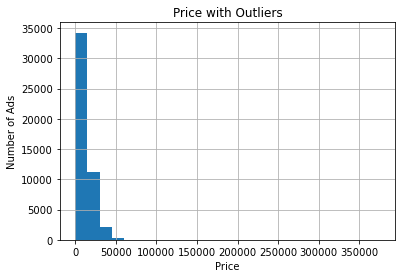

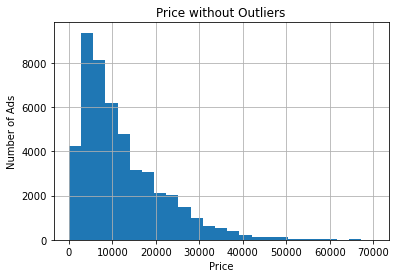

In [5]:
## 4.1

#Price
vehicles['price'].describe()
vehicles.hist('price', bins = 25)
plt.title('Price with Outliers')
plt.xlabel('Price')
plt.ylabel('Number of Ads')
filter_price = vehicles.query( 'price <= 70000')
filter_price.hist('price', bins = 25)
plt.title('Price without Outliers')
plt.xlabel('Price')
plt.ylabel('Number of Ads')

### Conclusion

The histogram with the outliers is harder to read. It is clear the greatest number of vehicles are priced around 10000, as shown with the outlier graph. The graph without the outliers gives a better representation of the data. With this graph we can see that the most significant price for a vehicle is around 5000-6000. After 6000 the amount of cars per price steadily drops.

Text(0, 0.5, 'Number of Ads')

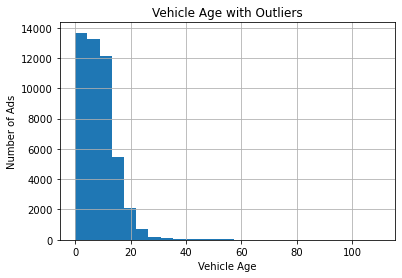

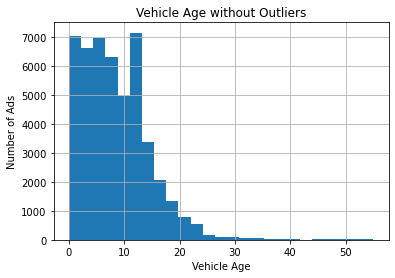

In [6]:
## 4.2

#Vehicles age
vehicles['vehicle_age'].describe()
vehicles.hist('vehicle_age', bins = 25)
plt.title('Vehicle Age with Outliers')
plt.xlabel('Vehicle Age')
plt.ylabel('Number of Ads')
filter_vehicle_age = vehicles.query( 'vehicle_age <= 55')
filter_vehicle_age.hist('vehicle_age', bins = 25)
plt.title('Vehicle Age without Outliers')
plt.xlabel('Vehicle Age')
plt.ylabel('Number of Ads')

### Conclusion

The graph with outliers does not show the peak around vehicles 10 years old. The graph without outliers is much easier to read. You can clearly see that the vehicle with most ads is around 12 years old. 

Text(0, 0.5, 'Number of Ads')

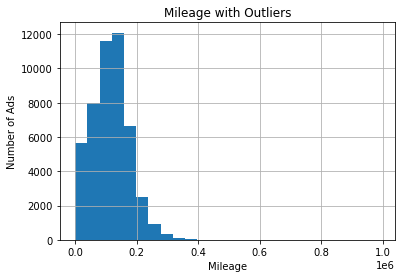

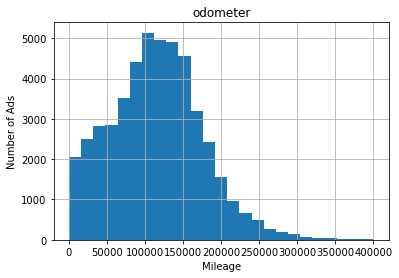

In [7]:
## 4.3

#Mileage
vehicles['odometer'].describe()
vehicles.hist('odometer', bins = 25)
plt.title('Mileage with Outliers')
plt.xlabel('Mileage')
plt.ylabel('Number of Ads')
filter_odometer = vehicles.query( 'odometer <= 400000')
filter_odometer.hist('odometer', bins = 25)
plt.xlabel('Mileage')
plt.ylabel('Number of Ads')

### Conclusion

Both graphs clearly show that vehicles with 100000 miles have the most ads. One possiblity for this is because vehicle owners want a new car once their vehicle gets to 100000 miles. The graph without outliers shows a steadier decrease with the number of ads as the mileage increases on the vehicles.

Text(0, 0.5, 'Number of Ads')

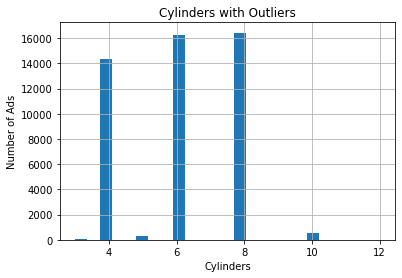

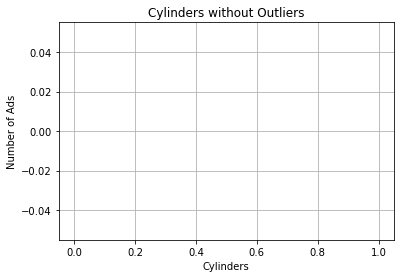

In [8]:
## 4.4

#Cylinders
vehicles['cylinders'].describe()
vehicles.hist('cylinders', bins = 25)
plt.title('Cylinders with Outliers')
plt.xlabel('Cylinders')
plt.ylabel('Number of Ads')
filter_cylinders = vehicles.query( 'cylinders in ("4", "6", "8")')
filter_cylinders.hist('cylinders', bins = 25)
plt.title('Cylinders without Outliers')
plt.xlabel('Cylinders')
plt.ylabel('Number of Ads')

### Conclusion 

Outliers do not affect the shape of the graph. Most vehicles have either 4,6, or 8 cylinders. 

Text(0, 0.5, 'Number of Ads')

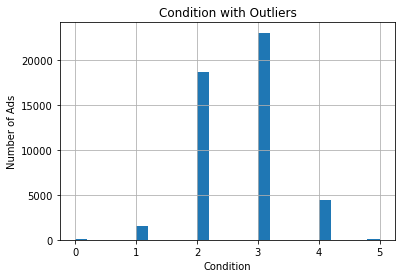

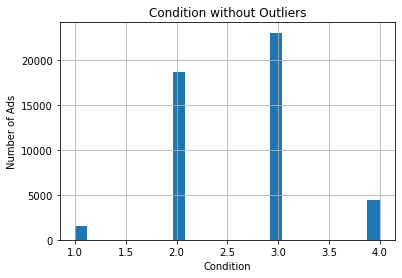

In [9]:
## 4.5

#Condition
vehicles['condition'].describe()
vehicles.hist('condition', bins = 25)
plt.title('Condition with Outliers')
plt.xlabel('Condition')
plt.ylabel('Number of Ads')
filter_condition = vehicles.query( '1 <= condition <= 4')
filter_condition.hist('condition', bins = 25)
plt.title('Condition without Outliers')
plt.xlabel('Condition')
plt.ylabel('Number of Ads')

### Conclusion

Removing the outliers does not change the graph structure. Most vehicles sold are in excellent condition.

33.0

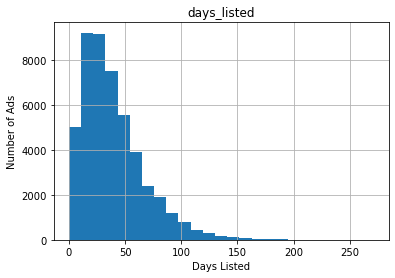

In [10]:
## 4.6

#Days advertised
vehicles['days_listed'].describe()
vehicles.hist('days_listed', bins = 25)
plt.xlabel('Days Listed')
plt.ylabel('Number of Ads')
vehicles['days_listed'].mean()
vehicles['days_listed'].median()

### Conclusion

Most ads are listed from 10-35 days. The average span of an ad is 38 days. The shortest time for an ad was one day. The ad either sold fast or it was an error in the data. The longest an ad was on the website was 271 days. One reason the car could have been on the website for long is the author never removed the listing.

The typical lifetime of an ad is between 15 to 60 days. This is the amount of time most ads were posted on the website. Ads were removed quickly if they spend less than 10 days on the website. Longer running ads stay on the website for about 100 days or more. Not many vehicles are on the website for that long.

Text(0, 0.5, 'Number of Ads')

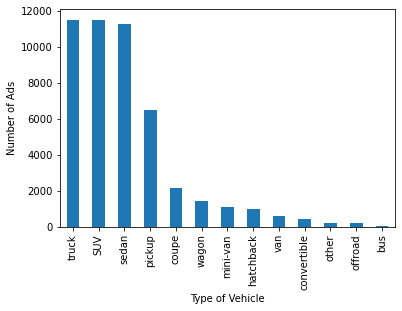

In [11]:
## 4.7

price_per_vehicle = vehicles.pivot_table(index = 'type', values = 'price', aggfunc = 'mean')
vehicles['type'].value_counts()
vehicles['type'].value_counts().plot(kind='bar') 
plt.xlabel('Type of Vehicle')
plt.ylabel('Number of Ads')

### Conclusion

The type of vehicle with the most ads are SUV's and trucks. SUV's, trucks, sedans, and pickups take up a significant amount of ad space on the website.

(0.0, 200000.0)

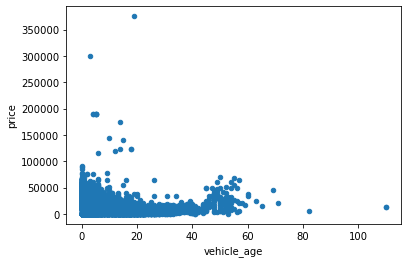

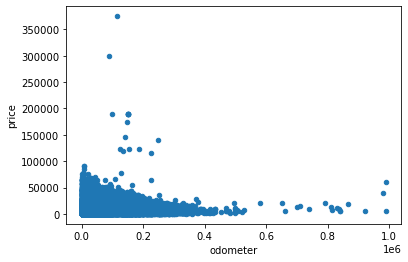

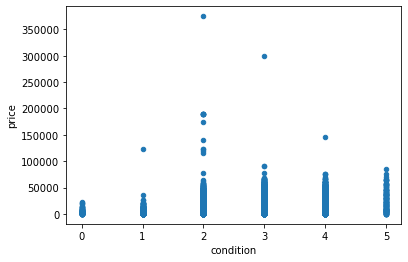

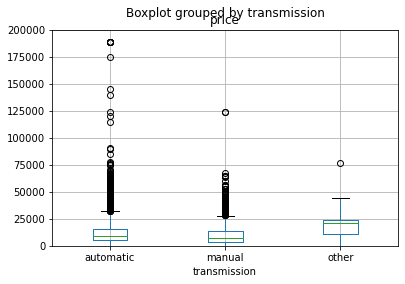

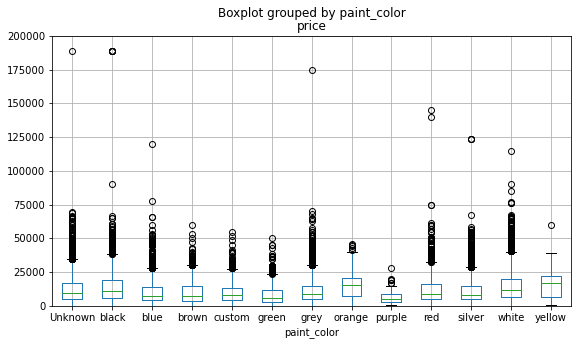

In [12]:
## 4.8

#Age
vehicles.plot(x='vehicle_age', y='price', kind='scatter')

#Mileage
vehicles.plot(x='odometer', y='price', kind='scatter')

#Condition
vehicles.plot(x='condition', y='price', kind='scatter')

#Transmission
vehicles['transmission'].value_counts()
vehicles.boxplot(column = 'price', by = 'transmission')
plt.ylim(0, 200000)

#Color
vehicles['paint_color'].value_counts()
vehicles.boxplot(column = 'price', by = 'paint_color', figsize = (9,5))
plt.ylim(0, 200000)

### Conclusion

Vehicles with an age between 0-20 and 40-60 are higher priced.

The highest priced vehicles reads between 150000 and 250000 miles on the odometer.

Vehicles with excellent condition are the most expensive.

The most expensive vehicles have automatic transmission. 

The color of the vehicle has no effect on the price. Vehicles with a paint color of unknown are just as expensive as other vehicles. Most vehicles sold are between 25000 and 75000 no matter what color they are. Black and grey vehicles have some prices up in the 175000 range but not enough to impact the analysis. 

## Overall conclusion

The most data missing belonged to paint type and odometer. This is probably because it was not included in the ads by the owners and does not affect the data at all. Most vehicles that sold fastest were lower priced and in excellent condition. The ideal time for an ad to be posted on the website is between 15 to 60 days. Overall, the greatest factor on price is transmission type. The most popular vehicles advertised are automatic transmission that are under 20 years old and between 15000 and 25000 miles. 

# Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn